# Design Considerations

1. **Choice of Object Detection Model**: Selecting an object detection model from the ones discussed in the lecture is very important. YOLO (You Only Look Once) is chosen for its balance of speed and accurace, which is critical for real-time or constraint bound applications such as this one. 

2. **Image Preprocessing Techniques**: Determining the pre-processing steps (such as resizing, normalization, color adjustments, etc) to apply to input images before feeding them into the model. An example can be that of resizing images to 416x416 pixels to match the input size expected by the YOLO model and normalizing pixel values to a range of 0 to 1. 

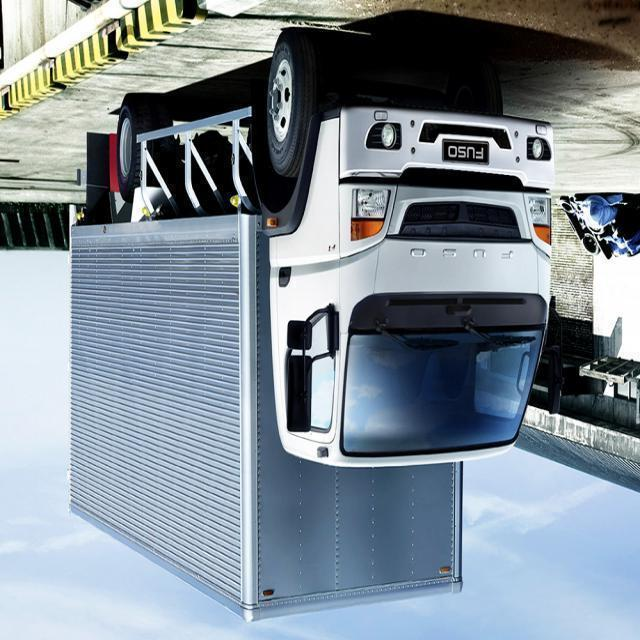

3. **Handling Diverse Environmental Conditions**: Incorporating strategies to handle various environmental conditions, such as lighting, weather, occlusions, etc. There are data augmentation techniques during training to simulate different conditions such as rain, fog, and variations on lighting. For example, images taken during different times of the dat and in different weather conditions to ensure that the model can generalize well accross scenarios.

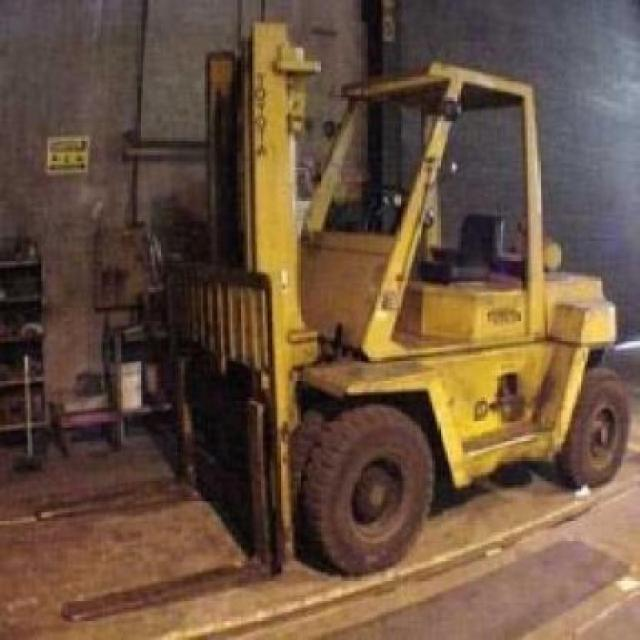
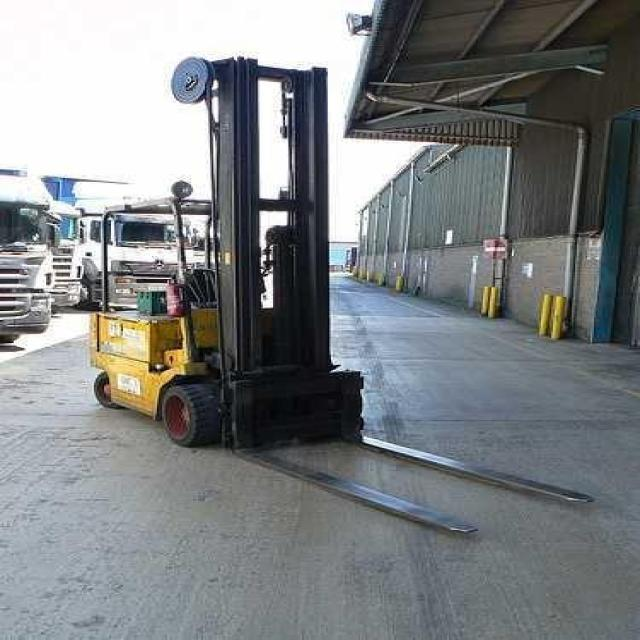

4. **Non-Maximal Suppression (NMS) Parameters**: Setting the thresholds for NMS to filer overlapping bounding boxes effectively can have a significant impact in the prediction accuracy of the model. For example, setting an intersection over Union (IoU) threshold of 0.4 and score threshold of 0.5 to balance between eliminating false positives and retaining true positives. An instance of the effect of this decision can be detection in an image with overlapping objects such as the one below.

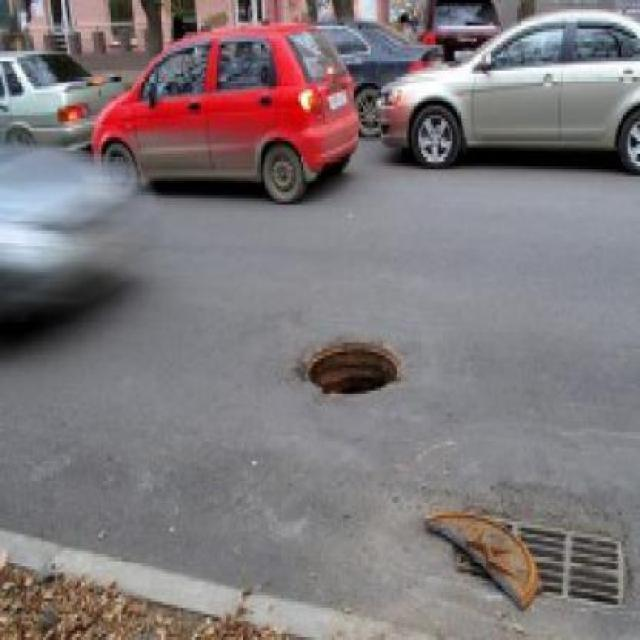
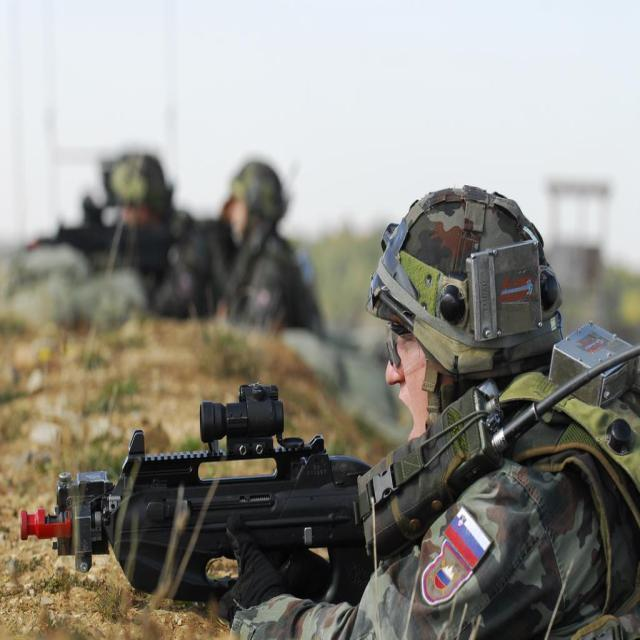

5. **Deployment and Hardware Considerations**: Choosing the right deployment platform and hardware specifications can be a significant factor on model performance. Particularly if the model is to be used in real time. For example, the use of a device without sufficient hardware resources to generate predictions with low latency. An instance of this can be illustrated when a webcam is used for possible hazardous conditions in a worksite. 

# Analysis of Two Design Considerations

## Choice of Object Detection Model (YOLO)

In the model, the YOLO (You Only Look Once) model is selected for object detection. The model files `yolov4-tiny-logistics_size_416_1.cfg` and `yolov4-tiny-logistics_size_416_1.weights` are used to initialize the `YOLOObjectDetector` class. The YOLO model is known for its balance of speed and accurace, making it suitable for real-time applications.

1. **Speed and efficiency**:

    - YOLO's architecture processes images swiftly, which is essential for real-time operations where the robot needs to make quick decisions based on the webcam feed. This is crucial in a logistics setting where the robot might need to navigate busy warehouses, avoid obstacles, and handle items efficiently.

    - Consider a scenario where the robot is navigating a warehouse floor. The speed of YOLO allows it to instantly detect and flag a moving forklift, a stack of cardboard boxes, or a person crossing its path, ensuring smooth and safe operation.

2. **Accuracy and Generalization**: 

    -  YOLO can predict multiple bounding boxes and class probabilities directly from full images, making it robust in detecting various objects listed, such as barcodes, safety vests, and license plates. Its ability to generalize across different object sizes and types is beneficial for the diverse detection requirements in a logistics environment.

    - YOLO may struggle with small objects or heavily occluded scenes, which could affect the detection of smaller items like gloves or partially hidden barcodes.
    - For example, in a busy loading dock, YOLO can accurately detect larger objects like trucks and freight containers. However, fine-tuning might be needed to ensure smaller items like gloves on a shelf or a barcode on a moving box are reliably detected.

## Image Preprocessing Techniques
In the system input images are resized to 416x416 pixels and pixel values are normalized. This pre-processing is handled in the `predict` method of the `YOLOObjectDetector` class.

1. **Consistency and Standardization**:

    - Resizing images to a fixed size ensures that the input is consistent, which is crucial for maintaining the model's performance. Normalizing pixel values helps in standardizing the input data, which can improve the model's ability to generalize across different images.

    - The robot may receive images from different parts of the warehouse under varying lighting conditions. By resizing and normalizing these images, the system ensures that each input is uniform, thus helping the model to consistently detect objects like helmets and traffic cones.

2. **Impact on Model Performance**:

    - Proper preprocessing enhances the model's accuracy by ensuring that the images match the expected format and scale, allowing the model to leverage its learned features effectively. This is particularly important for detecting the wide range of objects in the logistics environment.
    
    - Excessive resizing might lead to a loss of detail, which is detrimental for detecting small or detailed objects like QR codes or the text on license plates. Additionally, if normalization is not handled correctly, it might introduce distortions that affect detection accuracy.

    - An image from a webcam capturing a barcode on a moving box might need preprocessing steps like contrast adjustment to ensure the barcode is clear and detectable. Without this, the resizing alone may not prepare the image adequately, potentially resulting in missed detections.